### Import Packages 

In [2]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import seaborn as sns

### Load Data

In [4]:
avocados = pd.read_csv("//Users/jaclynhuff/Desktop/avocados.csv")

In [5]:
avocados.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/15,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/15,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/15,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/15,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/15,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### Question: Does the total volume of avocados sold differ between Indianapolis, Orlando, and PhoenixTuscon?

In [7]:
regions = ["Indianapolis ", "Orlando", "PhoenixTucson"]

In [9]:
avocado1 = avocados["region"].isin(regions)

In [10]:
avocado2 = avocados[avocado1].copy()

In [11]:
avocado2.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1612,0,12/27/15,0.99,305773.54,211102.90,20765.29,124.04,73781.31,40641.55,33139.76,0.0,conventional,2015,Orlando
1613,1,12/20/15,1.21,200074.81,131152.60,15794.56,122.07,53005.58,36258.03,16747.55,0.0,conventional,2015,Orlando
1614,2,12/13/15,0.96,310101.52,217679.37,24260.86,168.63,67992.66,31407.15,36585.51,0.0,conventional,2015,Orlando
1615,3,12/6/15,1.20,199063.82,135222.96,21555.66,121.93,42163.27,24098.62,18064.65,0.0,conventional,2015,Orlando
1616,4,11/29/15,0.96,262683.80,190361.54,21007.77,37.82,51276.67,21536.82,29739.85,0.0,conventional,2015,Orlando


In [16]:
avocado2.region.value_counts()

Orlando          338
PhoenixTucson    338
Name: region, dtype: int64

### recode categorical variable

In [17]:
dict = {'Indianapolis' : 0, 'Orlando' : 1, 'PhoenixTucson' : 2}

In [18]:
avocado2['region'] = avocado2.region.replace(dict)

In [19]:
avocado2.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1612,0,12/27/15,0.99,305773.54,211102.90,20765.29,124.04,73781.31,40641.55,33139.76,0.0,conventional,2015,1
1613,1,12/20/15,1.21,200074.81,131152.60,15794.56,122.07,53005.58,36258.03,16747.55,0.0,conventional,2015,1
1614,2,12/13/15,0.96,310101.52,217679.37,24260.86,168.63,67992.66,31407.15,36585.51,0.0,conventional,2015,1
1615,3,12/6/15,1.20,199063.82,135222.96,21555.66,121.93,42163.27,24098.62,18064.65,0.0,conventional,2015,1
1616,4,11/29/15,0.96,262683.80,190361.54,21007.77,37.82,51276.67,21536.82,29739.85,0.0,conventional,2015,1


In [20]:
avocado2.region.value_counts()

1    338
2    338
Name: region, dtype: int64

### Assumptions

##### Normality

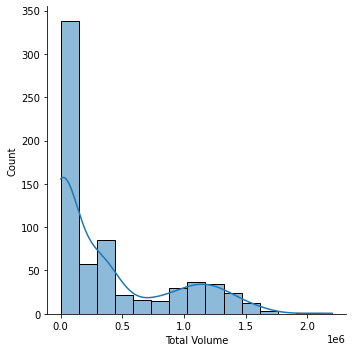

In [21]:
sns.displot(avocado2['Total Volume'], kde = True)
## positively skewed

In [24]:
avocado2['TVsqrt'] = np.sqrt(avocado2['Total Volume'])
## take square root to transform for a possible correction

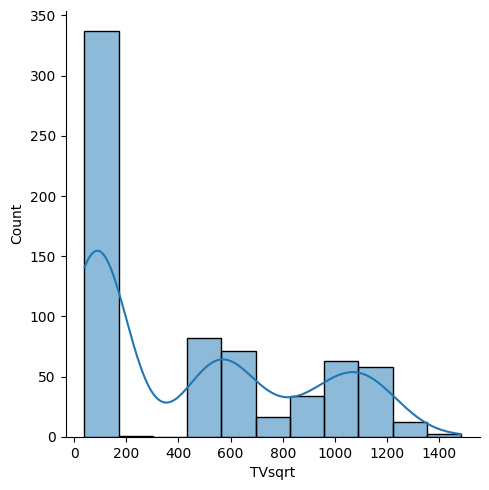

In [25]:
sns.displot(avocado2['TVsqrt'], kde = True)
## does not really make the total volume more approx. normally distributed - try log

In [26]:
avocado2['TVlog'] = np.log(avocado2['Total Volume'])
## take log to transform for a possible correction

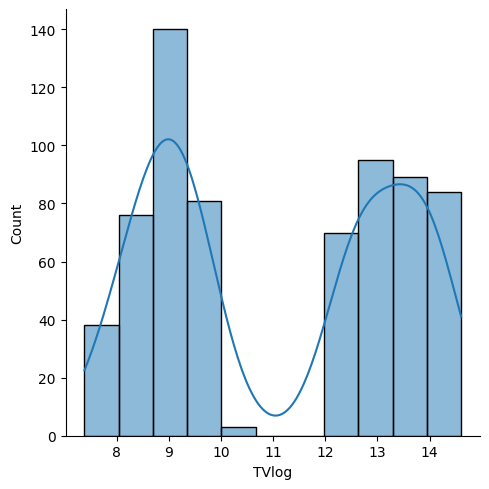

In [27]:
sns.displot(avocado2['TVlog'], kde = True)
## The is perhaps best - though it does not really look approx normal

#### Homogeneity of Variance

In [28]:
scipy.stats.bartlett(avocado2["TVlog"], avocado2["region"])

BartlettResult(statistic=1180.124651203016, pvalue=1.2729076650184803e-258)

#### ANOVA

In [31]:
stats.f_oneway(avocados["Total Volume"][avocados["region"]=='Indianapolis'],
                    avocados["Total Volume"][avocados["region"]=='Orlando'],
                    avocados["Total Volume"][avocados["region"]=='PhoenixTucson'])
## appears to be significant difference with that p-value

F_onewayResult(statistic=174.05378837225294, pvalue=1.101276256457687e-65)

### Interpret Results

In [32]:
postHoc = MultiComparison(avocado2["TVlog"], avocado2["region"])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)
## reject the null hypothesis for all

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     1      2   1.0474   0.0 0.7103 1.3845   True
-------------------------------------------------


In [33]:
avocado3 = avocado2[['region', 'Total Volume']]

In [34]:
avocado3.groupby("region").mean()

,Total Volume
region,
1,173552.378373
2,578826.368343


### PhoenixTucson has the highest total volume, with Chicago having the least total volume of the three.